In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [3]:
data = pd.read_csv("../data/processed/warsaw_house_data_500.csv", index_col=0)

In [4]:
X, y = data.drop("cost", axis=1), data["cost"]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
y_pred = model.predict(X_val)

In [8]:
print(y_pred[:5])
print(y_val[:5])

[29365.60073835 17896.24240464 18877.91794801 29365.60073835
 17878.37968938]
5349    51032.26
3011    15817.27
5799    20000.00
1430    24901.96
8791    22258.77
Name: cost, dtype: float64


In [9]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.3f}")
print(f"R2: {r2:.3f}\n")

MSE: 46120102.049
R2: 0.206



In [10]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

           Feature   Coefficient
12           hotel   4779.004971
4         pharmacy   2908.077578
13            dorm   1178.265020
7          theatre   1113.328377
2             stop    120.028220
6       attraction     98.932465
5              aed     39.947034
8             tree     31.517495
10          forest      0.000000
9             bush    -24.837995
3     bike station   -538.011477
11  police station  -1646.587366
1              lon  -2448.371280
0              lat -26497.647187


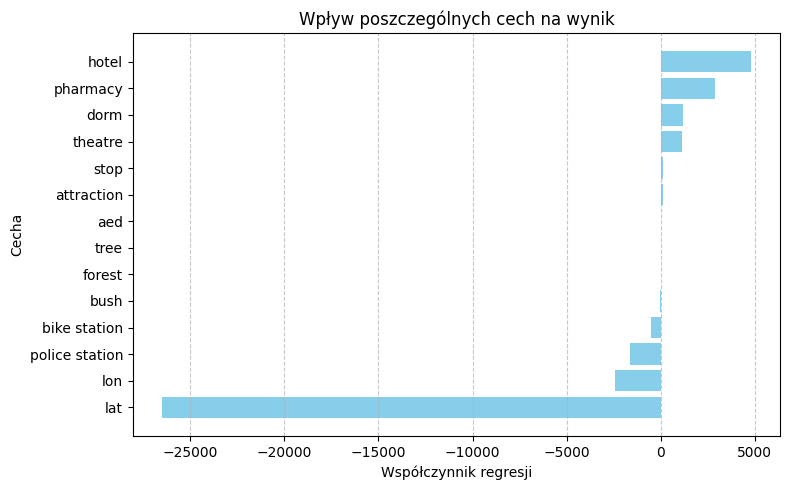

In [11]:
plt.figure(figsize=(8, 5))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color='skyblue')
plt.title("Wpływ poszczególnych cech na wynik")
plt.xlabel("Współczynnik regresji")
plt.ylabel("Cecha")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../reports/figures/linear_regression_coefficients_plot.png")
plt.show()

In [13]:
with open("model_linear_regression.pkl", "wb") as f:
    pickle.dump(model, f)